In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
from sklearn.datasets import make_blobs

In [161]:
X,_=make_blobs(n_samples=500,centers=5)
print(X.shape)

(500, 2)


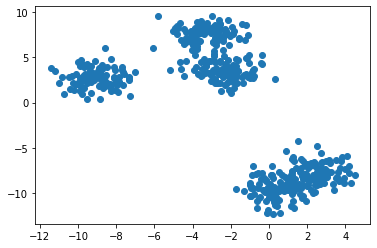

In [162]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [163]:
k=5
colors=["red","green","blue","pink","orange"]

# Dictionary

clusters={}

# Init Cluster Centers
for i in range(k):
    center=10*(2*np.random.random((2,))-1)
    cluster={
        "center":center,
        "points":[],
        "color":colors[i]
    }
    clusters[i]=cluster
print(clusters)

{0: {'center': array([ 7.18135275, -3.65920069]), 'points': [], 'color': 'red'}, 1: {'center': array([ 6.15268396, -9.13030425]), 'points': [], 'color': 'green'}, 2: {'center': array([-8.35010899,  3.73028397]), 'points': [], 'color': 'blue'}, 3: {'center': array([5.10205062, 7.21108049]), 'points': [], 'color': 'pink'}, 4: {'center': array([ 5.06706877, -8.32644478]), 'points': [], 'color': 'orange'}}


In [164]:
clusters[0]

{'center': array([ 7.18135275, -3.65920069]), 'points': [], 'color': 'red'}

In [165]:
X.shape

(500, 2)

In [166]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [167]:
# 1. Step - Assign each point to one of the cluster based upon distance
def assignPointtoCluster(clusters):
    m=X.shape[0]
    for i in range(m):
        current_x=X[i]
        dist=[]
        #For every cluster center find the one nearest to the point        
        for j in range(k):
            cc=clusters[j]["center"]
            d=distance(current_x,cc)
            dist.append(d)
        nearest=np.argmin(dist)
        clusters[nearest]["points"].append(current_x)

In [168]:
# update Cluster Centers based upon mean of the points assigned to the cluster
def updateClusterCenters(clusters):
    for i in range(k):
        pts=np.array(clusters[i]["points"])
        if pts.shape[0]>0:
            u=pts.mean(axis=0)
            clusters[i]["center"]=u
            clusters[i]["points"]=[]

In [169]:
def plotClusters(clusters):
    for i in range(k):
        #Get all the points assigned
        pts=np.array(clusters[i]["points"])
        ui=clusters[i]["center"]
        if pts.shape[0]>0:
            clr=clusters[i]["color"]
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        plt.scatter(ui[0],ui[1],color="black",marker="*")
        

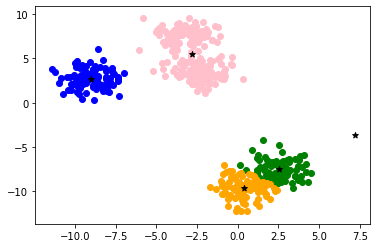

In [176]:
assignPointtoCluster(clusters)
plotClusters(clusters)
updateClusterCenters(clusters)

In [177]:
from sklearn.cluster import KMeans

In [178]:
km=KMeans(n_clusters=5)

In [179]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [180]:
centers=km.cluster_centers_

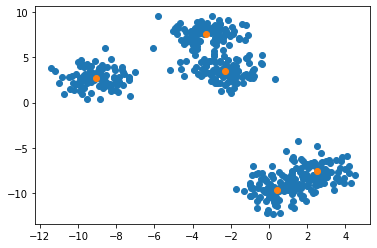

In [181]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1])